# Genetik Algoritma

## Kütüphanelerin Tanımlanması

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Veri Okuma ve Veri Hazırlama

In [2]:
veri = pd.DataFrame({'Malzeme': ['İsviçre Çakısı',
                                'El Feneri', 
                                'Pusula', 
                                'Su Arıtma Cihazı', 
                                'Paracord', 
                                'İlk Yardım Kiti', 
                                'Uyku Tulumu', 
                                'Çadır', 
                                'Harita', 
                                'Çakmak'],
                    'Ağırlık': [0.2, 0.3, 0.1, 0.5, 0.4, 0.3, 1.5, 2.0, 0.2, 0.05],
                    'Hacim': [0.5, 0.2, 0.1, 1.0, 0.3, 0.4, 2.0, 3.0, 0.3, 0.1],
                    'Önem Seviyesi': [5, 4, 3, 5, 2, 4, 4, 5, 3, 1]})

In [3]:
ağırlık_kısıtı = 3
hacim_kısıtı = 5

## Modelleme

In [4]:
def popülasyon_secimi(popülasyon_boyutu, kromozom_uzunluğu):
    
    popülasyon = []
    for _ in range(popülasyon_boyutu):
        kromozom = [random.randint(0, 1) for _ in range(kromozom_uzunluğu)]
        popülasyon.append(kromozom)
        
    return popülasyon

In [5]:
def uygunluk(en_iyi_kromozom):
    
    ağırlık_toplamı = np.sum(np.array(en_iyi_kromozom) * np.array(veri['Ağırlık']))
    hacim_toplamı = np.sum(np.array(en_iyi_kromozom) * np.array(veri['Hacim']))
    önem_toplamı = np.sum(np.array(en_iyi_kromozom) * np.array(veri['Önem Seviyesi']))
    
    uygunluk_skoru = hacim_toplamı + önem_toplamı
    
    if ağırlık_toplamı > ağırlık_kısıtı or hacim_toplamı > hacim_kısıtı:
        uygunluk_skoru = 0
    
    return uygunluk_skoru

In [6]:
def ebeveyn_secimi(popülasyon, uygunluk_değerleri, ebeveyn_sayısı):
    
    uygunluk_toplamı = sum(uygunluk_değerleri)
    olasılıklar = [uygunluk / uygunluk_toplamı for uygunluk in uygunluk_değerleri]
    ebeveynler = random.choices(popülasyon,
                                weights=olasılıklar,
                                k=ebeveyn_sayısı)
    
    return ebeveynler

In [7]:
def çaprazlama(ebeveynler, çocuk_sayısı):
    
    çocuklar = []
    for _ in range(çocuk_sayısı):
        ebeveyn1, ebeveyn2 = random.sample(ebeveynler, k=2)
        çocuk = []
        for gen1, gen2 in zip(ebeveyn1, ebeveyn2):
            rastgele = random.random()
            if rastgele < 0.5:
                çocuk.append(gen1)
            else:
                çocuk.append(gen2)
        çocuklar.append(çocuk)
        
    return çocuklar

In [8]:
def mutasyon(çocuklar, mutasyon_olasılığı):
    
    for çocuk in çocuklar:
        for i in range(len(çocuk)):
            rastgele = random.random()
            if rastgele < mutasyon_olasılığı:
                çocuk[i] = 1 - çocuk[i]
                
    return çocuklar

In [9]:
def en_iyi_malzemeler(en_iyi_kromozom):
    
    malzemeler = [veri['Malzeme'][i] for i in range(len(en_iyi_kromozom)) if en_iyi_kromozom[i] == 1]
    
    return malzemeler

In [10]:
popülasyon_boyutu = 50
jenerasyon_sayısı = 100
kromozom_uzunluğu = len(veri)

In [11]:
def genetik_algoritma(popülasyon_boyutu,
                      kromozom_uzunluğu,
                      jenerasyon_sayısı):
    
    popülasyon = popülasyon_secimi(popülasyon_boyutu,
                                   kromozom_uzunluğu)
    en_iyi_uygunluk = 0
    en_iyi_kromozom = None
    uygunluk_skorları = []
    
    for _ in range(jenerasyon_sayısı):
        uygunluk_değerleri = [uygunluk(kromozom) for kromozom in popülasyon]
        en_yüksek_uygunluk = max(uygunluk_değerleri)
        en_yüksek_index = uygunluk_değerleri.index(en_yüksek_uygunluk)
        
        if en_yüksek_uygunluk > en_iyi_uygunluk:
            en_iyi_uygunluk = en_yüksek_uygunluk
            en_iyi_kromozom = popülasyon[en_yüksek_index]
        
        ebeveynler = ebeveyn_secimi(popülasyon,
                                    uygunluk_değerleri,
                                    ebeveyn_sayısı=2)
        çocuklar = çaprazlama(ebeveynler,
                              çocuk_sayısı=popülasyon_boyutu)
        çocuklar = mutasyon(çocuklar,
                            mutasyon_olasılığı=0.1)
        popülasyon = çocuklar
        
        uygunluk_skorları.append(en_iyi_uygunluk)
    
    plt.plot(uygunluk_skorları)
    plt.xlabel('jenerasyon')
    plt.ylabel('Uygunluk Skoru')
    plt.title('Genetik Algoritma Optimizasyonu')
    plt.show()
    
    return en_iyi_kromozom

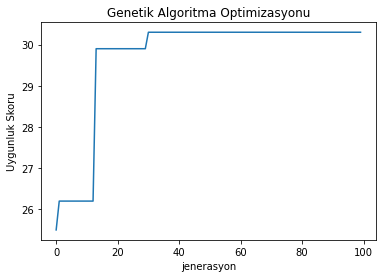

En İyi Malzemeler:
İsviçre Çakısı
El Feneri
Pusula
Su Arıtma Cihazı
İlk Yardım Kiti
Uyku Tulumu
Çakmak
En İyi Uygunluk Skoru: 30.3


In [12]:
en_iyi_kromozom = genetik_algoritma(popülasyon_boyutu,
                                    kromozom_uzunluğu,
                                    jenerasyon_sayısı)

en_iyi_malzemeler_listesi = en_iyi_malzemeler(en_iyi_kromozom)

print("En İyi Malzemeler:")
for malzeme in en_iyi_malzemeler_listesi:
    print(malzeme)
print("En İyi Uygunluk Skoru:", uygunluk(en_iyi_kromozom))